In [6]:
import topogenesis as tg
import pyvista as pv
import numpy as np
np.random.seed(0)

In [7]:
# create a step one moore neighbourhood
s = tg.create_stencil("von_neumann", 1)

# set the center to 0, to prevent staying at the same point
s.set_index([0, 0, 0], 0)

# set the x-dimension to 0, since we are working in 2d
s.set_index([1, 0, 0], 0)
s.set_index([-1, 0, 0], 0)

# assign the random choice function
s.function = tg.sfunc.random_choice

print(s)

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 1 0]
  [1 0 1]
  [0 1 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [8]:
# initiate the lattice 0x7x7
l = tg.lattice([[0, -3, -3], [0, 3, 3]], default_value=0, dtype=int)

# place the walker in the center of the lattice
l[0, 3, 3] += 1

print(l)

[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]


In [9]:
# retrieve the indices of cells (0,1,2, ... n)
l_inds = l.indices

print(l_inds)

[[[ 0  1  2  3  4  5  6]
  [ 7  8  9 10 11 12 13]
  [14 15 16 17 18 19 20]
  [21 22 23 24 25 26 27]
  [28 29 30 31 32 33 34]
  [35 36 37 38 39 40 41]
  [42 43 44 45 46 47 48]]]


In [10]:
# initiating the plotter
p = pv.Plotter()

# fast visualization of the lattice
l.fast_vis(p)

# setup camera and close
p.set_position([10,0,0])
p.reset_camera()

# Open a gif
p.open_gif("ABM_Random_Walker.gif")

# main iteration forloop
for i in range(20):

    # apply the stencil (function) to the lattice
    random_neighbour = l_inds.apply_stencil(s, border_condition="roll")

    # convert the current positions id and selected neighbour id to lattice indices
    old_pos = np.array(np.unravel_index(l_inds[l > 0], l.shape))
    new_pos = np.array(np.unravel_index(random_neighbour[l > 0], l.shape))

    # apply the movements
    l[old_pos[0], old_pos[1], old_pos[2]] -= 1
    l[new_pos[0], new_pos[1], new_pos[2]] += 1

    # update the plot
    ######
    p.clear()
    l.fast_vis(p)

    # this will trigger the render
    p.write_frame()

# Close movie and delete object
p.close()

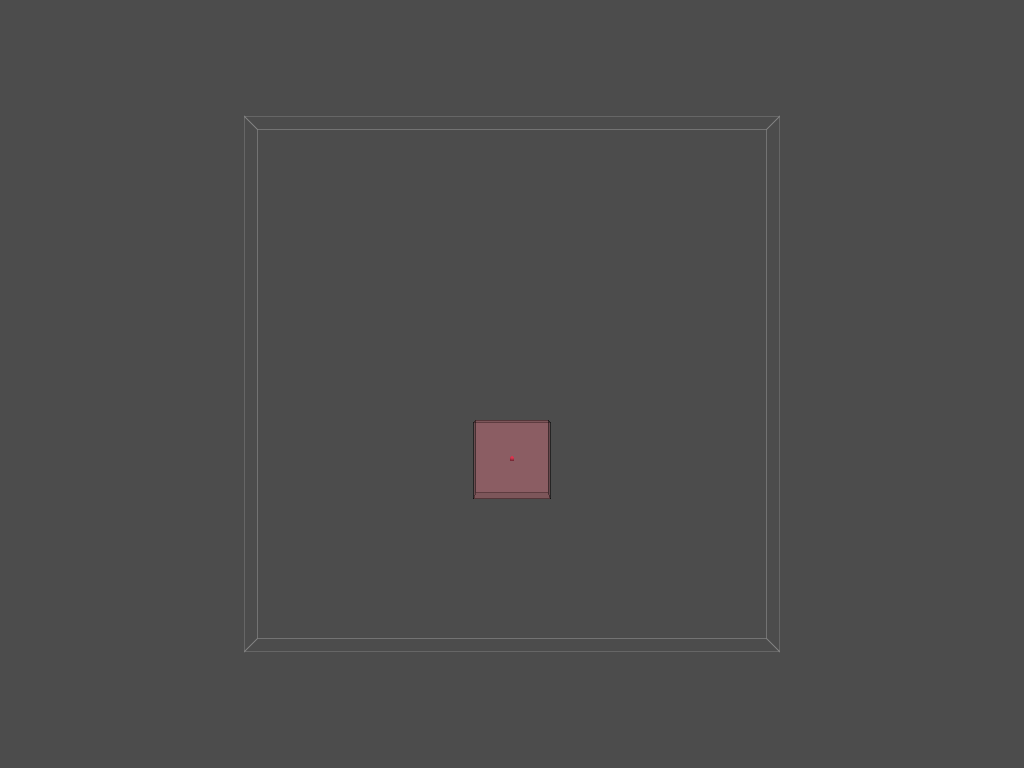

In [11]:
from IPython.display import Image
Image(filename="ABM_Random_Walker.gif")